In [3]:
import pandas as pd
from rdkit import Chem
from rdkit.Chem import rdFMCS

In [4]:
dataTable = pd.read_csv("testResults.csv.csv")
print(dataTable.shape)
dataTable.head(3)

(268948, 12)


,KT_id_1,Smiles_1,KT_id_2,Smiles_2,hERG_mixedIC50_1,EstFa_Rat_1,hERG_mixedIC50_2,EstFa_Rat_2,pair_info,pair_id,Num_Consts,pair_detail
0,KT-0013567,C1=C(C2=CC=CC=C2)N(C2=CC=C(NC(C)=O)C=C2)C(=O)/...,KT-0013672,C1=C(C2=CC=CC=C2)N(C2=CC=C(NC(C)=O)C=C2)C(=O)/...,NaN,NaN,NaN,NaN,1==>2,"(1,2)",2,"{1: [1, 2, 3, 4, 5, 6], 17071: [1048406, 10484..."
1,KT-0013672,C1=C(C2=CC=CC=C2)N(C2=CC=C(NC(C)=O)C=C2)C(=O)/...,KT-0013567,C1=C(C2=CC=CC=C2)N(C2=CC=C(NC(C)=O)C=C2)C(=O)/...,NaN,NaN,NaN,NaN,2==>1,"(1,2)",2,"{1: [], 17071: []}"
2,KT-0035007,C1=CC(Br)=CC=C1[C@@H]1C[C@H]1C(=O)N1CC(C2=CC=C...,KT-0035717,O=C(C1=CNN=C1I)N1CC(C2=CC=C3C(=C2)NC(C(=O)N(C)...,NaN,NaN,NaN,NaN,10==>1592,"(10,1592)",1,"{942: [62186, 62187, 62188, 62189, 62190, 62191]}"


In [5]:
def _getSubstructure(mol, smart_pattern):
    # Find substructure matches
    matches = mol.GetSubstructMatches(smart_pattern)
    # print("Substructure matches:", matches)

    # Extract and print the substructures
    substructs = []
    print(f"{len(matches)}")
    for match in matches:
        # Get the bond indices
        bond_indices = []
        for bond in mol.GetBonds():
            if set([bond.GetBeginAtomIdx(), bond.GetEndAtomIdx()]).issubset(set(match)):
                bond_indices.append(bond.GetIdx())

        # Create the substructure using bond indices
        substruct = Chem.PathToSubmol(mol, bond_indices)
        substruct_smiles = Chem.MolToSmiles(substruct)
        substructs.append(substruct_smiles)
        # print("Substructure SMILES:", substruct_smiles)
    if len(substructs) > 1:
        print(f"Warning, there are multiple matches of this pattern in the molecule!")
    return substructs[0]

def _rmSubstructure(mol, smart_pattern):
    extra_substruct = Chem.DeleteSubstructs(mol, smart_pattern)
    extra_substruct_smiles = Chem.MolToSmiles(extra_substruct)
    return extra_substruct_smiles

def _calcMCS(smi_1, smi_2):
    try:
        print(f"Step-1, smi=>mol")
        mol_1 = Chem.MolFromSmiles(smi_1)
        mol_2 = Chem.MolFromSmiles(smi_2)
        print(f"Step-2, find MCS")
        mol_mcs = rdFMCS.FindMCS([mol_1, mol_2])
        smart_pattern = mol_mcs.smartsString
        
        print(f"Step-3, find const")
        smi_const = _getSubstructure(mol_1, smart_pattern)
        # smi_common_2 = _getSubstructure(mol_2, smart_pattern)
        
        print(f"Step-4, find diffs")
        smi_from = _rmSubstructure(mol_1, smart_pattern)
        smi_to = _rmSubstructure(mol_2, smart_pattern)
    except Exception as e:
        print(f"Warning, error msg:", e)
        results = ['', '', '']
    else:
        results = [smi_const, smi_from, smi_to]
    return results



In [6]:
smi_1 = dataTable['Smiles_1'][666]
smi_2 = dataTable['Smiles_2'][666]
smi_1, smi_2

('COC1=C(C2=CC(C3=CCCN(C(CCN4C=CN=N4)=O)C3)=C(F)C3=C2C=C(C(N2CCN(C4=CC=CC=C4F)CC2)=O)N3)C=CC=C1',
 'FC1=C2NC(C(=O)N3CCN(C4=CN=C5C(=N4)NC=C5)CC3)=CC2=C(C2=C(OC)C=CC=C2)C=C1C1=CCCN(C(=O)CCN2N=NC=C2)C1')

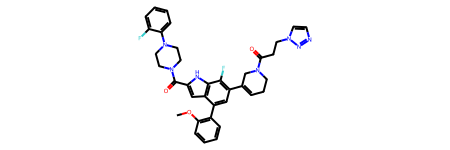

In [7]:
mol_1 = Chem.MolFromSmiles(smi_1)
mol_1

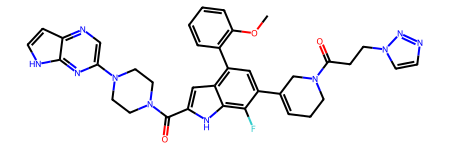

In [8]:
mol_2 = Chem.MolFromSmiles(smi_2)
mol_2

In [9]:
rdFMCS.FindMCS([mol_1, mol_2])

: 

: 

In [2]:
rdFMCS.FindMCS([Chem.MolFromSmiles('C#CCP'), Chem.MolFromSmiles('C=CCO')])

In [ ]:
from rdkit.Chem import MCS
MCS.FindMCS([mol_1, mol_2])

In [ ]:
results = _calcMCS(smi_1, smi_2)

In [ ]:
results